# Simple Bayesian Optimization (BayesOpt)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import norm

## Create Observations dataset

In [126]:
X = np.array([[0], [4], [5], [8], [10]])
y = np.array([.99, .55, .33, .95, .78])

## View GP Prior
Use SE kernel

In [127]:
gp = GaussianProcessRegressor()
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

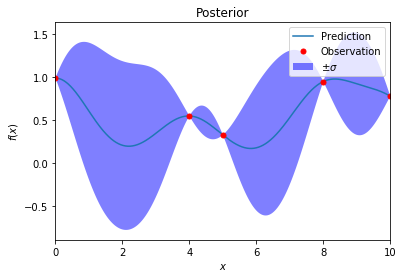

In [128]:
x = np.linspace(0, 10, num=1000).reshape(-1, 1)
y_pred, std = gp.predict(x, return_std=True)
plt.plot(x, y_pred, label='Prediction')
plt.plot(X, y, 'r.', markersize=10, label='Observation')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - std,
                        (y_pred + std)[::-1]]),
         alpha=.5, fc='b',  label='$\pm \sigma$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 10)
plt.title("Posterior")
plt.legend()
plt.show()

### Define Acquisition Function

In [90]:
def exp_improv(f_star, mu, sigma):
    '''Computes the expected improvement (EI).
    '''
    
    dif = f_star - mu
    scaled_dif = dif / sigma
    return dif * norm.cdf(scaled_dif) * sigma * norm.pdf(scaled_dif)

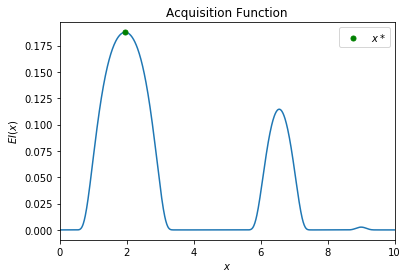

In [120]:
f_star = np.max(y)
mu = 0
sigma = std ** 2
ei = exp_improv(f_star, mu, sigma)
x_star = np.argmax(ei)
plt.plot(x, ei)
plt.plot(x[x_star], ei[x_star],'g.', markersize=10, label='$x*$')
plt.xlabel('$x$')
plt.ylabel('$EI(x)$')
plt.xlim(0, 10)
plt.legend()
plt.title("Acquisition Function")
plt.show()